In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time
from collections import deque 

## Variable Global

In [2]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [3]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [4]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [5]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [6]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [7]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [8]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [9]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1
    
    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [10]:
# Genera solucion aleatoria
def solucionAleatoria(tam, num):
    vResult = list(range(0,tam))
    random.seed(num)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [11]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [12]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [13]:
def representaResultados(analisisResultado):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
        
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])

# Fichero a Analizar

In [14]:
# x, y = leeArchivo("st70.tsp")
# x, y = leeArchivo("ch130.tsp")
# x, y = leeArchivo("a280.tsp")
# x, y = leeArchivo("p654.tsp")
# x, y = leeArchivo("vm1084.tsp")
x, y = leeArchivo("vm1748.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy

In [15]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.7027356624603271


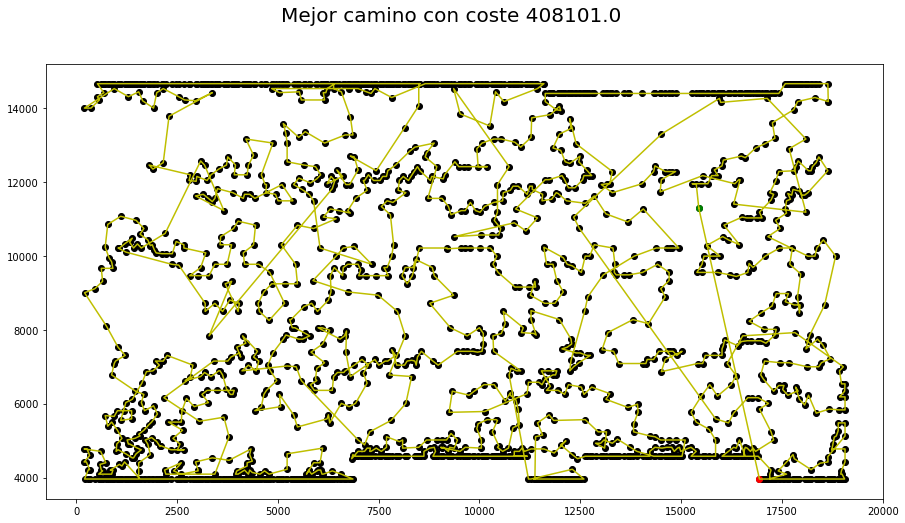

In [16]:
# Greedy
resultado, km = greedy(x, y,"s")

# Busqueda Aleatoria

In [17]:
# Algoritmo Busqueda Aleatoria
def busquedaAleatoria(x,y):
    tam = len(x)
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,5):
        resultadoIntermedio = []
        tic()
        mejorCoste = float("inf")
        mejor = [];
        random.seed(z)
        for j in range(0,1600*tam):
            vResult = list(range(0,tam))
            for i in range(0,tam):
                rnd = random.randint(0,tam-1)
                vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
            coste = calculaCoste(vResult)
            if coste < mejorCoste:
                mejor = vResult.copy()
                mejorCoste = coste

        if mejorCoste < costeFinal:
            costeFinal = mejorCoste
            mejorCam = mejor.copy()
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(mejorCoste)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla       Coste       Tiempo
0      0.0  14134673.0  9414.890769
1      1.0  14134601.0  8141.170093
2      2.0  14128347.0  7961.258787
3      3.0  14163069.0  7945.802499
4      4.0  14131611.0  7940.497670

Media coste:  14138460.2
Desviación típica coste:  14000.158041965098


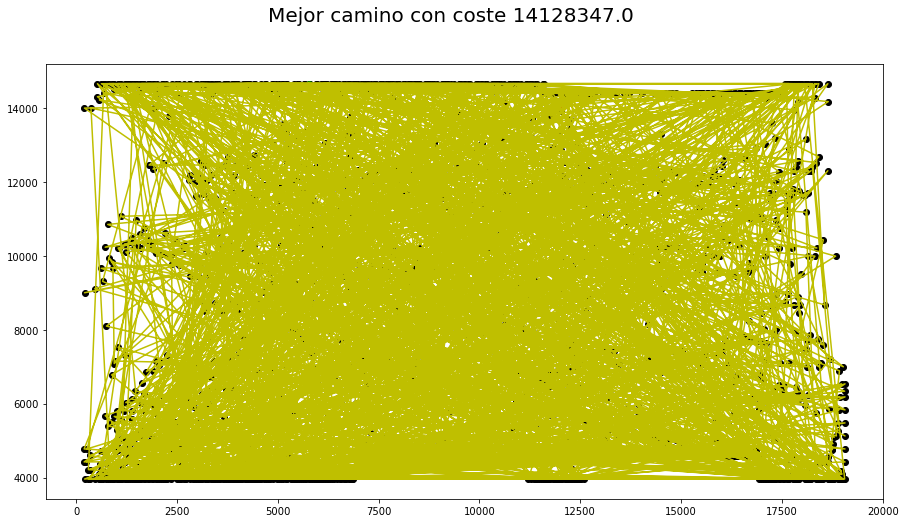

In [18]:
# Busqueda Aleatoria
busquedaAleatoria(x, y)

# Busquedas Locales

## Busqueda Local El Mejor

In [18]:
# Devuelve el mejor vecino
def mejorVecino(w, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste.copy()
    for i in range(0, len(w)):
        for j in range(i + 1,len(w)):
            w2 = w.copy();
            w2[i], w2[j] = w2[j], w2[i]
            coste = calculaCosteVecino(costeSolAntigua, w, w2, i, j)
            if coste < mejorCoste :
                mejor = w2
                mejorCoste = coste
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
    return mejor, mejorCoste, sumador

In [19]:
# Algoritmo Busqueda Local El Mejor
def busquedaLocalElMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = mejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla       Coste  Numero Evaluaciones     Tiempo
0      0.0  14684089.0            2796800.0  28.137440
1      1.0  14952989.0            2796800.0  28.380073
2      2.0  15106312.0            2796800.0  27.758184
3      3.0  14861355.0            2796800.0  29.118783
4      4.0  14962200.0            2796800.0  27.712787
5      5.0  14757511.0            2796800.0  27.283191
6      6.0  14822860.0            2796800.0  26.910370
7      7.0  14769694.0            2796800.0  25.743497
8      8.0  14609878.0            2796800.0  25.935947
9      9.0  14903149.0            2796800.0  25.493886

Media coste:  14843003.7
Desviación típica coste:  146166.0276368015
Media numero de evaluaciones:  2796800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  27.24741587638855


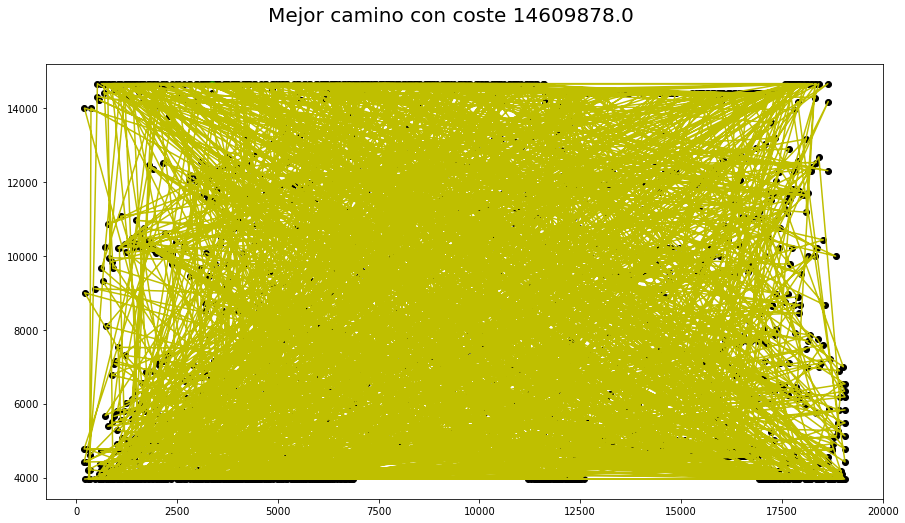

In [20]:
# Busqueda Local El Mejor
busquedaLocalElMejor(x, y)

## Busqueda Local El Primer Mejor

In [15]:
# Devuelve el primer mejor vecino
def primerMejorVecino(w, sumador, maximo):
    actual = w;
    actualCoste = calculaCoste(w)
    i = 0
    encontrado = False
    while i < len(w) and encontrado == False:
        j = i + 1
        while j < len(w) and encontrado == False:
            mejor = actual.copy()
            mejor[i], mejor[j] = mejor[j], mejor[i]
            coste = calculaCosteVecino(actualCoste, actual, mejor, i, j)
            if coste < actualCoste:
                encontrado = True
            else:
                j += 1
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
        i += 1
    if actualCoste == coste:
        mejor = w
        coste = actualCoste
    return mejor, coste, sumador

In [16]:
# Algoritmo Busqueda Local El Primer Mejor
def busquedaLocalElPrimerMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = primerMejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
                i += 1
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
        
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  7992956.0            2796800.0  42.309319
1      1.0  7776885.0            2796800.0  41.500563
2      2.0  7946362.0            2796800.0  39.598688
3      3.0  7950083.0            2796800.0  38.605509
4      4.0  8218826.0            2796800.0  37.392631
5      5.0  7865409.0            2796800.0  38.015510
6      6.0  8096013.0            2796800.0  35.881584
7      7.0  8042342.0            2796800.0  36.372337
8      8.0  7553040.0            2796800.0  38.743574
9      9.0  8005377.0            2796800.0  37.627557

Media coste:  7944729.3
Desviación típica coste:  183018.88509965912
Media numero de evaluaciones:  2796800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  38.604727149009705


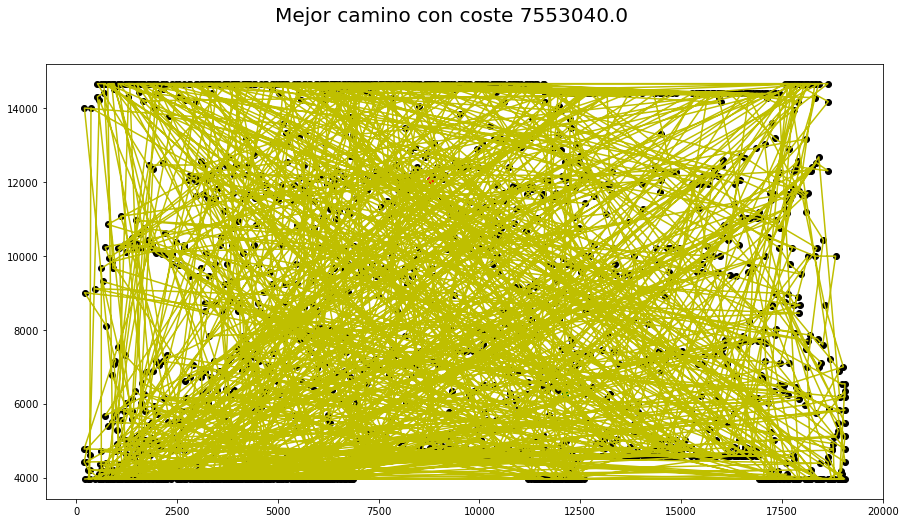

In [17]:
# Busqueda Local El Primero Mejor
busquedaLocalElPrimerMejor(x, y)

## Busqueda Local El Mejor Aleatorizado

In [15]:
# Devuelve el mejor vecino Aleatorizado
def mejorVecinoAleatorizado(w, numVecinos, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste
    for i in range(0, numVecinos):
        w2 = w.copy();
        rnd1 = random.randint(0,len(w) - 1)
        rnd2 = random.randint(0,len(w) - 1)
        w2[rnd1], w2[rnd2] = w2[rnd2], w2[rnd1]       
        coste = calculaCosteVecino(costeSolAntigua, w, w2, rnd1, rnd2)
        if coste < mejorCoste :
            mejor = w2
            mejorCoste = coste 
        if sumador >= maximo:
            break
        else :
            sumador +=1
    return mejor, mejorCoste, sumador

In [16]:
# Algoritmo Busqueda Local El Mejor Aleatorizado
def busquedaLocalElMejorAleatorizado(x,y,numVecinosLim, k):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        encontrado = False
        while i < maximo and encontrado == False:
            iterador = 0
            fueraBucle = False
            while iterador < k and fueraBucle == False:
                iterador += 1
                mejorV, mejorCost, i = mejorVecinoAleatorizado(w, numVecinosLim, i, maximo)  
                if mejorCost < costeActual or iterador > k:
                    fueraBucle = True
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  3030078.0            2796800.0  48.573287
1      1.0  2972055.0            2796800.0  49.897964
2      2.0  3014399.0            2796800.0  51.731739
3      3.0  3015841.0            2796800.0  41.338562
4      4.0  3139447.0            2796800.0  39.443332
5      5.0  2949476.0            2796800.0  44.879065
6      6.0  3120978.0            2796800.0  54.373848
7      7.0  3000969.0            2796800.0  51.989059
8      8.0  2845352.0            2796800.0  55.251625
9      9.0  2959868.0            2796800.0  49.062378

Media coste:  3004846.3
Desviación típica coste:  84373.73769399786
Media numero de evaluaciones:  2796800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  48.65408606529236


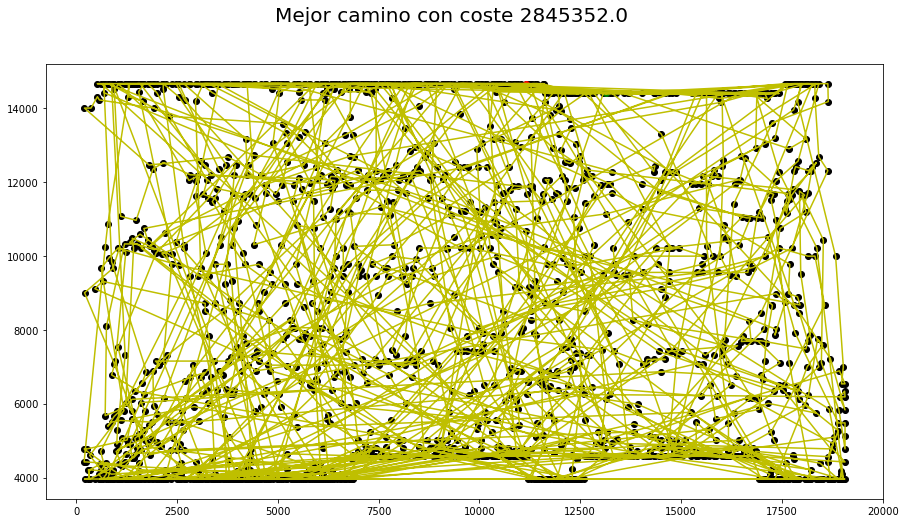

In [17]:
# Busqueda Local El Mejor Aleatorizado
numVecinosLim = round(len(x) / 2)
k = 5
busquedaLocalElMejorAleatorizado(x, y, numVecinosLim, k)

# Enfriamiento Simulado

In [24]:
# Selecciona candidatos
def seleccionaSolucion(sActual, coste):
    rnd1 = random.randint(0,len(sActual) - 1)
    rnd2 = random.randint(0,len(sActual) - 1)
    sCandidata = sActual.copy()
    sCandidata[rnd1], sCandidata[rnd2] = sCandidata[rnd2], sCandidata[rnd1]
    costeCandiata = calculaCosteVecino(coste, sActual, sCandidata, rnd1, rnd2)
    return sCandidata, costeCandiata

In [25]:
# Algoritmo de Enfriamiento Simulado
def enfriamientoSimuladoIteraciones(x, y, mu, phi, L):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual  
        numIteraciones = 80 * len(x)
        evaluaciones = 0
        resultado, km = greedy(x, y,"n")
        Tinicial = (mu /(- np.log(phi))) * km
        iterador = 0
        T = Tinicial
        while iterador < numIteraciones:
            for i in range(0,L):
                sCandidata, costeCandidata = seleccionaSolucion(sActual, costeActual)
                evaluaciones += 1
                delta = costeCandidata - costeActual
                exponente = (- delta) / T
                if (delta < 0) or (random.uniform(0, 1) < math.e**exponente):
                    sActual = sCandidata
                    costeActual = costeCandidata
                    if costeActual < costeBest:
                        sBest = sActual
                        costeBest = costeActual
            T = Tinicial / (1 + iterador)
            iterador += 1

        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(evaluaciones)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  2451541.0            2796800.0  60.856728
1      1.0  2157007.0            2796800.0  58.932810
2      2.0  2295151.0            2796800.0  58.396401
3      3.0  2419678.0            2796800.0  59.157465
4      4.0  2271689.0            2796800.0  59.457075
5      5.0  2317825.0            2796800.0  62.034257
6      6.0  2373466.0            2796800.0  56.002714
7      7.0  2250417.0            2796800.0  51.571244
8      8.0  2199872.0            2796800.0  52.764034
9      9.0  2299196.0            2796800.0  49.054129

Media coste:  2303584.2
Desviación típica coste:  92274.21543638287
Media numero de evaluaciones:  2796800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  56.822685623168944


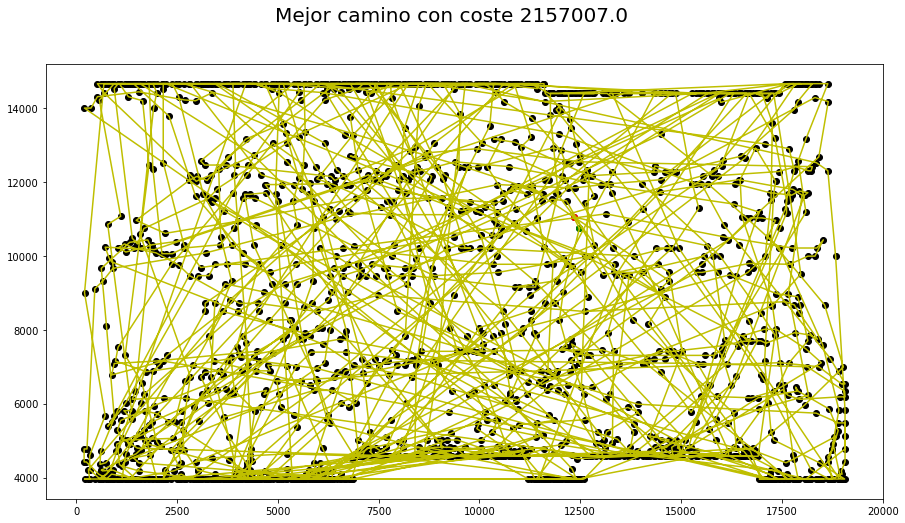

In [26]:
# Algoritmo de Enfriamiento Simulado
# Si el incremento el numero de vecinos (L) aumento la exploración y puedo conseguir llegar a un minimo
# Si el incremento es demasiado bajo, es un algoritmo muy parecido a la busqueda local del mejor aleatorizado
# Con alpha ( o metodo de enfriamiento) y L podemos variar la pendiente de la gráfica, es decir, explorar mas o menos
mu = 0.3
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  2343688.0            2796800.0  48.976444
1      1.0  2384248.0            2796800.0  49.724964
2      2.0  2281121.0            2796800.0  47.254876
3      3.0  2284728.0            2796800.0  47.571135
4      4.0  2214032.0            2796800.0  46.679575
5      5.0  2158815.0            2796800.0  47.223011
6      6.0  2302784.0            2796800.0  47.824718
7      7.0  2226938.0            2796800.0  47.341541
8      8.0  2197814.0            2796800.0  47.403035
9      9.0  2294232.0            2796800.0  47.188732

Media coste:  2268840.0
Desviación típica coste:  69146.63777637911
Media numero de evaluaciones:  2796800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  47.718803024291994


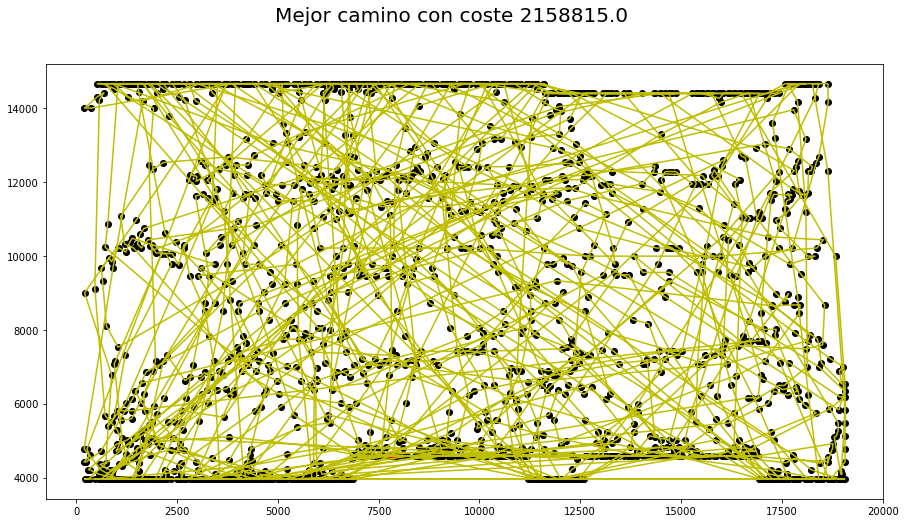

In [27]:
# Algoritmo de Enfriamiento Simulado
mu = 0.3
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  2268120.0            2796800.0  47.109249
1      1.0  2285024.0            2796800.0  47.691565
2      2.0  2215252.0            2796800.0  47.698854
3      3.0  2251750.0            2796800.0  47.652897
4      4.0  2219643.0            2796800.0  46.653088
5      5.0  2333548.0            2796800.0  46.984885
6      6.0  2278729.0            2796800.0  46.506440
7      7.0  2189960.0            2796800.0  49.033746
8      8.0  2235174.0            2796800.0  47.181283
9      9.0  2184751.0            2796800.0  48.062844

Media coste:  2246195.1
Desviación típica coste:  46463.77730244401
Media numero de evaluaciones:  2796800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  47.45748512744903


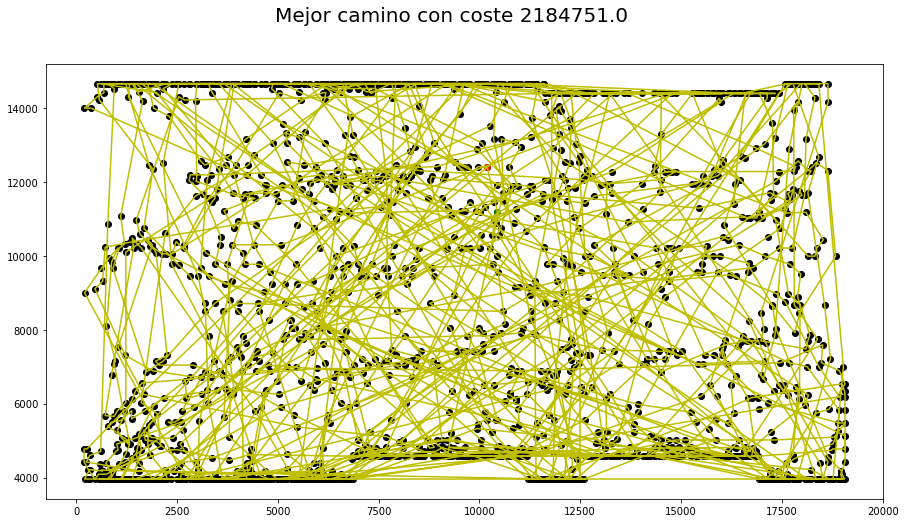

In [28]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  2122169.0            2796800.0  47.509008
1      1.0  2250134.0            2796800.0  47.873839
2      2.0  2222371.0            2796800.0  46.767761
3      3.0  2282621.0            2796800.0  50.993921
4      4.0  2291421.0            2796800.0  48.779835
5      5.0  2205992.0            2796800.0  49.238838
6      6.0  2229579.0            2796800.0  49.966056
7      7.0  2339623.0            2796800.0  47.015531
8      8.0  2173215.0            2796800.0  49.522112
9      9.0  2150321.0            2796800.0  45.612224

Media coste:  2226744.6
Desviación típica coste:  67242.24816818003
Media numero de evaluaciones:  2796800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  48.327912497520444


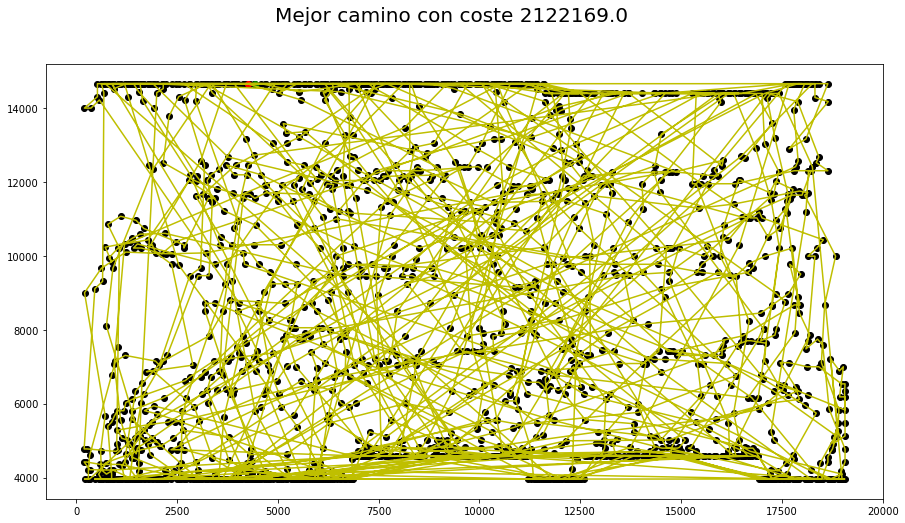

In [29]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

Semilla      Coste  Numero Evaluaciones      Tiempo
0      0.0  1853859.0            6992000.0  114.514481
1      1.0  1823355.0            6992000.0  163.872901
2      2.0  2040113.0            6992000.0  154.608531
3      3.0  2067687.0            6992000.0  162.747231
4      4.0  2001550.0            6992000.0  164.510021
5      5.0  1999792.0            6992000.0  169.170939
6      6.0  1891831.0            6992000.0  171.036641
7      7.0  1928937.0            6992000.0  168.708319
8      8.0  1967960.0            6992000.0  169.837865
9      9.0  2013506.0            6992000.0  168.191778

Media coste:  1958859.0
Desviación típica coste:  81504.81496615196
Media numero de evaluaciones:  6992000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  160.71987075805663


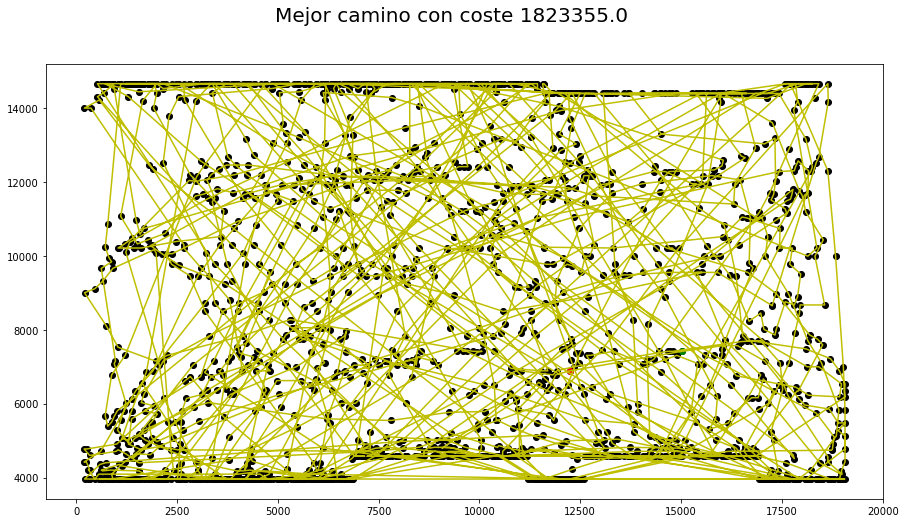

In [30]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 50
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

# Búsqueda Tabú

In [31]:
# Greedy de la memoria de frecuencia eligiendo el menor
def greedyMenor(memoriaFrecuencias, n):
    memoriaTemporal = memoriaFrecuencias.copy()
    elegidos = []
    for i in range(0,n):
        provisional = np.where(memoriaTemporal[:][i] == np.amin(memoriaTemporal[:][i]))[0][0]
        elegidos.append(provisional)
        memoriaTemporal[: , provisional] = float('inf')
    
    return elegidos

In [32]:
# Algoritmo de búsqueda Tabú
def busquedaTabu(x, y, numVecinos, numIter, numReinici):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        n = len(x)
        tenenciaTabu = round(n / 2)
        listaTabu = deque(maxlen=tenenciaTabu)
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual
        # Inicializo memoria de frecuencias
        memoriaFrecuencias = np.zeros((len(x),len(y)))
        for i in range(0,n):
            memoriaFrecuencias[i, sActual[i]] += 1
        
        iteraciones = numIter * n
        reinicializacion = round(iteraciones / (numReinici + 1))
        iterador = 0
        for i in range(0,iteraciones):
            # Genero/Analizo Vecinos
            mejorVecino = []
            costeMejor = float("inf")
            for k in range(0,numVecinos):
                piv1 = random.randint(0,len(x) - 1)
                piv2 = random.randint(0,len(x) - 1)
                sCandidata = sActual.copy()
                sCandidata[piv1], sCandidata[piv2] = sCandidata[piv2], sCandidata[piv1]
                costeCandidata = calculaCosteVecino(costeActual, sActual, sCandidata, piv1, piv2)
                iterador += 1
                
                seEvalua = False
                if((piv1,piv2) in listaTabu) or ((piv2,piv1) in listaTabu):
                    #Prueba de aspiración
                    if(costeCandidata < costeBest):
                        seEvalua = True
                else:
                    seEvalua = True
                    
                if (seEvalua and costeCandidata < costeMejor):  
                    mejorVecino = sCandidata.copy()
                    costeMejor = costeCandidata
                    mejorPiv1 = piv1
                    mejorPiv2 = piv2

            # Actualización de variables
            sActual = mejorVecino.copy()
            costeActual = costeMejor
            if costeMejor < costeBest:
                sBest = mejorVecino.copy()
                costeBest = costeMejor        

            # Actualizo Memoria de Frecuencias
            for p in range(0,n):
                memoriaFrecuencias[p, sActual[p]] += 1

            # Actualizo lista tabú
            listaTabu.append((mejorPiv1, mejorPiv2))
            
            # Reinicializaciones
            if ((i + 1) % reinicializacion) == 0:
                rnd = random.random()
                if rnd < 0.25:
                    # Solucion Inicial Aleatoria
                    sActual = random.sample(range(n),n)
                    costeActual = calculaCoste(sActual)
                elif rnd < 0.75:
                    # Solucion Greedy
                    sActual = greedyMenor(memoriaFrecuencias,n)
                    costeActual = calculaCoste(sActual) 
                else:
                    # Solucion es la mejor hasta el momento
                    sActual = sBest.copy()
                    costeActual = costeBest

                # Nueva Tenencia Tabú
                rnd2 = random.uniform(0,1)
                if rnd2 < 0.5:
                    tenenciaTabu = round(tenenciaTabu / 2)
                else:
                    tenenciaTabu = tenenciaTabu + round(tenenciaTabu / 2) 

                listaTabu = deque([],maxlen=tenenciaTabu)
        
        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(iterador)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla      Coste  Numero Evaluaciones      Tiempo
0      0.0  3369023.0            2796800.0  193.850356
1      1.0  3149172.0            2796800.0  257.605297
2      2.0  3407101.0            2796800.0  207.648412
3      3.0  3221902.0            2796800.0  261.451869
4      4.0  3405218.0            2796800.0  229.238899
5      5.0  3200750.0            2796800.0  189.141741
6      6.0  3302593.0            2796800.0  187.976935
7      7.0  3268092.0            2796800.0  231.107962
8      8.0  3417383.0            2796800.0  212.809892
9      9.0  3250772.0            2796800.0  149.258129

Media coste:  3299200.6
Desviación típica coste:  96162.58820028596
Media numero de evaluaciones:  2796800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  212.00894918441773


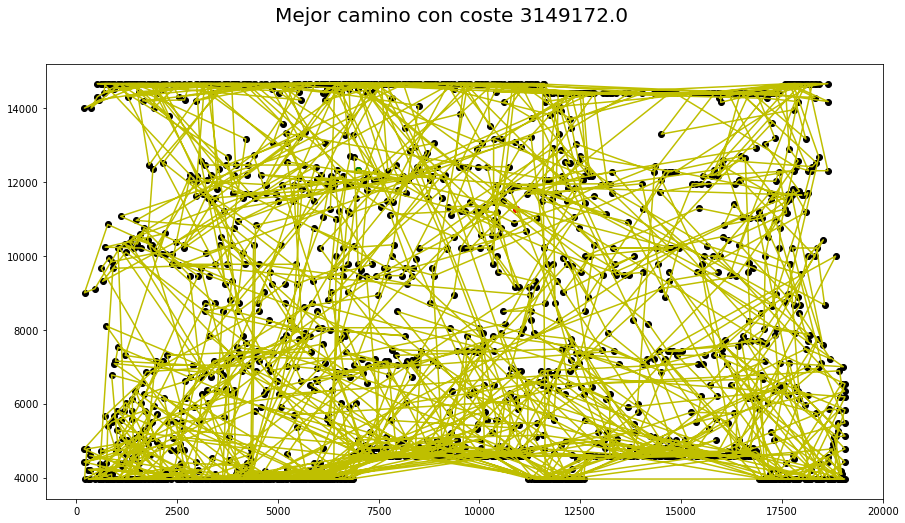

In [18]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

Semilla      Coste  Numero Evaluaciones       Tiempo
0      0.0  3331622.0            4195200.0   548.334913
1      1.0  3341274.0            4195200.0  1049.424690
2      2.0  3059339.0            4195200.0   358.606929
3      3.0  3253286.0            4195200.0   461.026899
4      4.0  3128736.0            4195200.0   508.658176
5      5.0  3236982.0            4195200.0   423.249911
6      6.0  3164681.0            4195200.0   550.299554
7      7.0  3124520.0            4195200.0   425.451924
8      8.0  3108617.0            4195200.0   295.514291
9      9.0  3295109.0            4195200.0   282.106447

Media coste:  3204416.6
Desviación típica coste:  100277.39740473258
Media numero de evaluaciones:  4195200.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  490.2673732995987


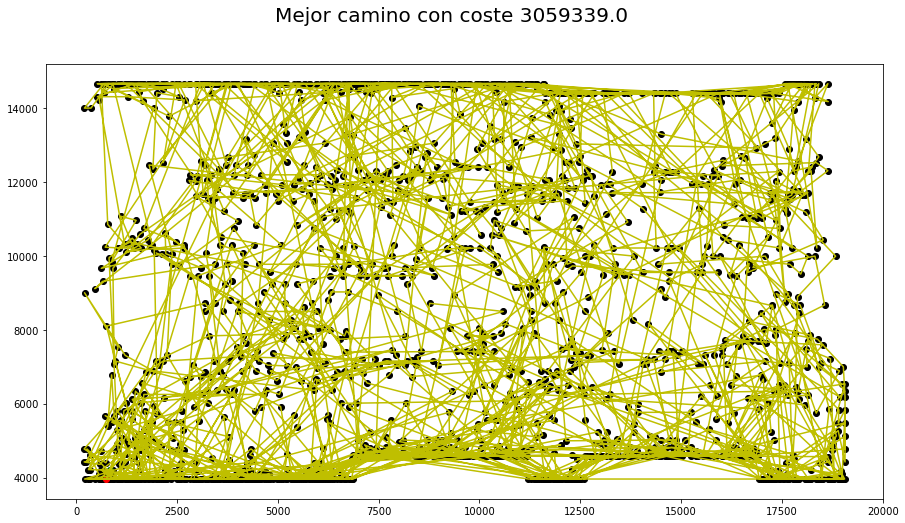

In [33]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

Semilla      Coste  Numero Evaluaciones      Tiempo
0      0.0  3433896.0            2796800.0  115.297424
1      1.0  3415682.0            2796800.0  115.724894
2      2.0  3552012.0            2796800.0  117.299151
3      3.0  3350393.0            2796800.0  133.205597
4      4.0  3370858.0            2796800.0  121.637286
5      5.0  3466816.0            2796800.0  118.390064
6      6.0  3638793.0            2796800.0  113.178502
7      7.0  3584622.0            2796800.0  112.648312
8      8.0  3448369.0            2796800.0  123.627663
9      9.0  3494973.0            2796800.0  120.850725

Media coste:  3475641.4
Desviación típica coste:  92812.5932765113
Media numero de evaluaciones:  2796800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  119.18596184253693


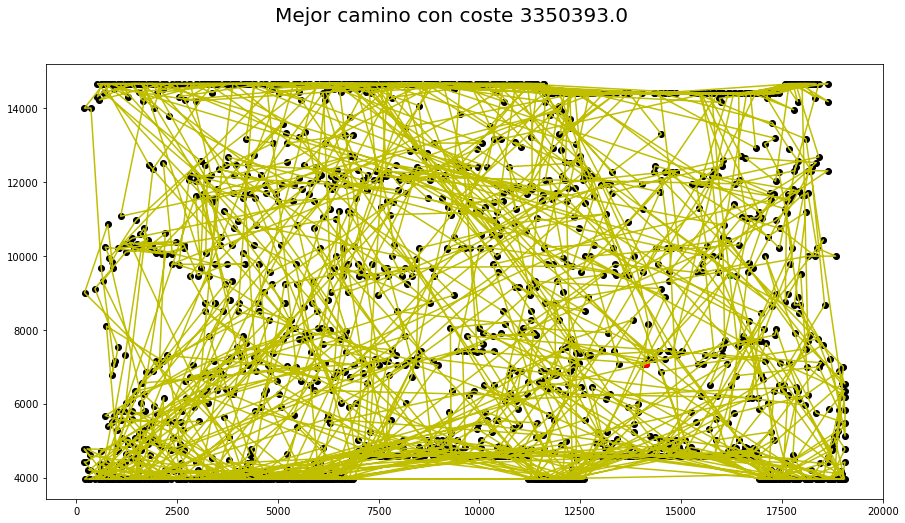

In [34]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 150
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

Semilla      Coste  Numero Evaluaciones      Tiempo
0      0.0  2728112.0            4894400.0  370.202266
1      1.0  2440445.0            4894400.0  236.207006
2      2.0  2751936.0            4894400.0  413.470877
3      3.0  2481979.0            4894400.0  261.492675
4      4.0  2715305.0            4894400.0  351.752175
5      5.0  2666796.0            4894400.0  301.152652
6      6.0  2498676.0            4894400.0  272.769920
7      7.0  2750533.0            4894400.0  557.598437
8      8.0  2561592.0            4894400.0  389.650445
9      9.0  2481889.0            4894400.0  266.453813

Media coste:  2607726.3
Desviación típica coste:  126664.95546216931
Media numero de evaluaciones:  4894400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  342.07502646446227


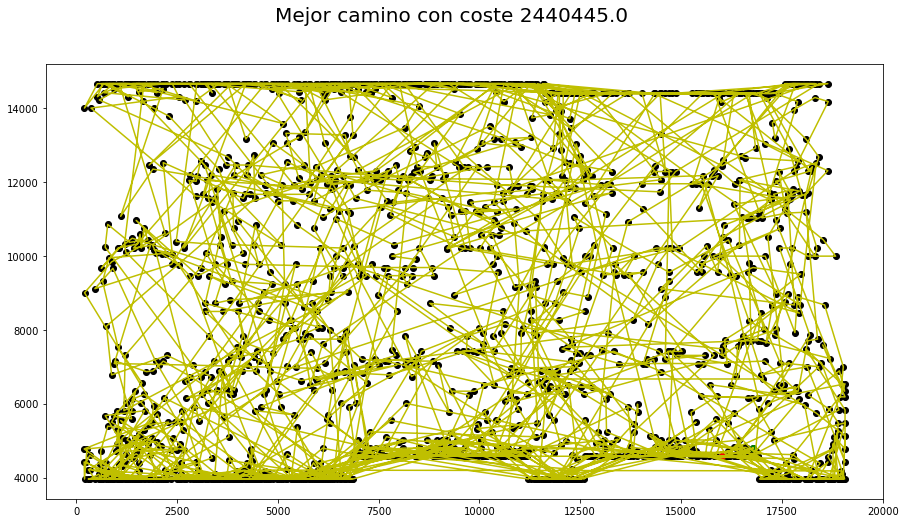

In [35]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)

Semilla      Coste  Numero Evaluaciones      Tiempo
0      0.0  2396420.0            7341600.0  448.895994
1      1.0  2827559.0            7341600.0  359.643224
2      2.0  2401504.0            7341600.0  420.448227
3      3.0  2533357.0            7341600.0  384.854937
4      4.0  2544540.0            7341600.0  472.975247
5      5.0  2559471.0            7341600.0  459.994610
6      6.0  2574362.0            7341600.0  635.324771
7      7.0  2814888.0            7341600.0  354.675686
8      8.0  2527992.0            7341600.0  484.400325
9      9.0  2580989.0            7341600.0  462.981396

Media coste:  2576108.2
Desviación típica coste:  144706.91701489448
Media numero de evaluaciones:  7341600.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  448.4194417238235


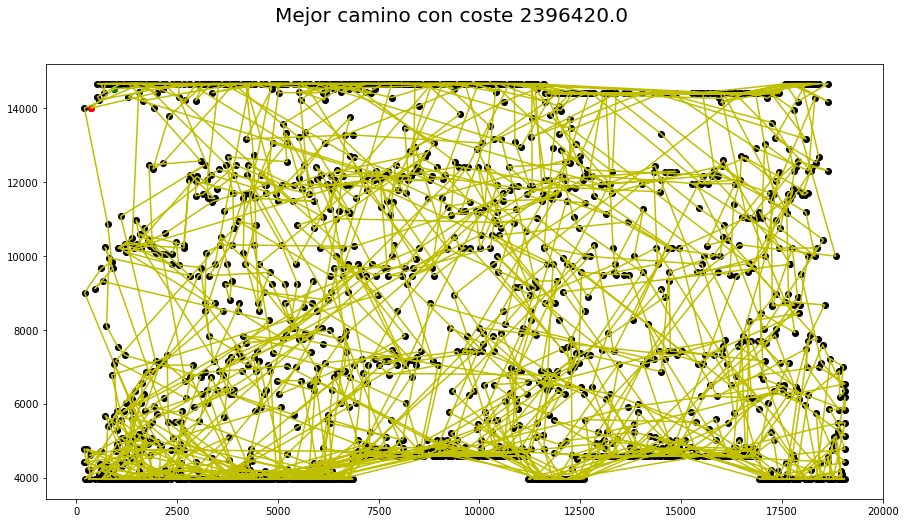

In [36]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 10
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)